In [ ]:
# https://github.com/FinanceData/FinanceDataReader 참고
!pip install finance-datareader
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pwd

/content


In [ ]:
!dir

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/lstm

/content/drive/MyDrive/lstm


In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import pandas_datareader as pdr
import os
import time
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

## **WTI 원유 네이버 금융 크롤링**

In [ ]:
# WTI 웹 크롤링 함수
def get_oil_price(code):
    delay = 0.01
    page = 1
    result = []
    start_time = datetime.now()
    
    print('[{}] 데이터 수집 시작. (code: {})'.format(start_time.strftime('%Y/%m/%d %H:%M:%S'), code))
    while(True):
        url = 'https://finance.naver.com/marketindex/worldDailyQuote.nhn?marketindexCd={}&fdtc=2&page={}'.format(code, page)
        data = pd.read_html(url)[0].dropna()
        if page !=1:
            try:
                if data.iloc[-1,0] == result[-1].iloc[-1,0]:
                    break
            except:
                break
        result.append(data)
        page += 1
        time.sleep(delay)
    
    oil_price = pd.concat(result).reset_index(drop=True) #결과물을 데이터 프레임 형식으로 변환합니다
    oil_price.columns = ['날짜', '종가', '전일대비', '등락율']
    oil_price['날짜'] = oil_price['날짜'].apply(lambda x: datetime.strptime(x, '%Y.%m.%d'))
    oil_price = oil_price[['날짜', '종가']]
    oil_price.insert(0, '코드', code) #유가 종류에 대한 컬럼 생성
    
    end_time = datetime.now()
    print('[{}] 데이터 수집 종료. (code: {}, 수집시간: {}초, 데이터수: {:,}개)'.format(end_time.strftime('%Y/%m/%d %H:%M:%S'), code, (end_time-start_time).seconds, len(oil_price)))
    return oil_price

### **거시 경제 변수 DATA 받아오기**

In [ ]:
kospi = fdr.DataReader('KS11', '2002-01-01', '2021-12-31') # KOSPI 200 지수
vix = fdr.DataReader('VIX', '2002-01-01', '2021-12-31') # VIX 지수
sp500 = fdr.DataReader('US500', '2002-01-01', '2021-12-31') # S&P500 지수 (NYSE)
dji = fdr.DataReader('DJI', '2002-01-01', '2021-12-31') # 다우 존스 지수 (DJI)
usdkrw = fdr.DataReader('USD/KRW', '2002-01-01', '2021-12-31') # 달러 원화
eurkrw = fdr.DataReader('EUR/KRW', '2002-01-01', '2021-12-31') # 유로 원화
cnykrw = fdr.DataReader('CNY/KRW', '2002-01-01', '2021-12-31') # 위안 원화
jpykrw = fdr.DataReader('JPY/KRW','2002-01-01', '2021-12-31') # 옌 원화
cl = fdr.DataReader('CL') # WTI유 선물 (NYMEX)
kr1yt = fdr.DataReader('KR1YT=RR') #1년 만기 한국국채 수익률
kr10yt = fdr.DataReader('KR10YT=RR') #10년 만기 한국국채 수익률
us1mt = fdr.DataReader('US1MT=X') # 1년 만기 미국국채 수익률
us10yt = fdr.DataReader('US10YT=X') # 10년 만기 미국국채 수익률

In [ ]:
print(us1mt.head(5))

            Close   Open   High    Low  Change
Date                                          
2001-12-27  1.751  1.751  1.751  1.751 -0.0057
2001-12-28  1.720  1.720  1.720  1.720 -0.0177
2001-12-31  1.720  1.720  1.720  1.720  0.0000
2002-01-02  1.740  1.740  1.740  1.740  0.0116
2002-01-03  1.720  1.720  1.720  1.720 -0.0115


In [ ]:
# oil_price_wti = get_oil_price('OIL_CL')

[2022/06/24 12:21:37] 데이터 수집 시작. (code: OIL_CL)
[2022/06/24 12:24:19] 데이터 수집 종료. (code: OIL_CL, 수집시간: 161초, 데이터수: 3,863개)


### **거시 변수 EXCEL파일로 변환**

In [ ]:
kospi.to_excel('kospi_raw.xlsx')
vix.to_excel('vix_raw.xlsx')
sp500.to_excel('sp500_raw.xlsx')
dji.to_excel('dji_raw.xlsx')
usdkrw.to_excel('usdkrw_raw.xlsx')
eurkrw.to_excel('eurkrw_raw.xlsx')
cnykrw.to_excel('cnykrw_raw.xlsx')
jpykrw.to_excel('jpykrw_raw.xlsx')
cl.to_excel('cl_raw.xlsx')
kr1yt.to_excel('kr1yt_raw.xlsx')
kr10yt.to_excel('kr10yt_raw.xlsx')
us1mt.to_excel('us1mt_raw.xlsx')
us10yt.to_excel('us10yt_raw.xlsx')

NameError: ignored

### **Google drive에 저장된 변수 불러오기**

In [ ]:
kospi = pd.read_excel('kospi_raw.xlsx')
vix = pd.read_excel('vix_raw.xlsx')
sp500 = pd.read_excel('sp500_raw.xlsx')
dji = pd.read_excel('dji_raw.xlsx')
usdkrw = pd.read_excel('usdkrw_raw.xlsx')
eurkrw = pd.read_excel('eurkrw_raw.xlsx')
cnykrw = pd.read_excel('cnykrw_raw.xlsx')
jpykrw = pd.read_excel('jpykrw_raw.xlsx')
cl = pd.read_excel('cl_raw.xlsx')
kr1yt = pd.read_excel('kr1yt_raw.xlsx')
kr10yt = pd.read_excel('kr10yt_raw.xlsx')
us1mt = pd.read_excel('us1mt_raw.xlsx')
us10yt = pd.read_excel('us10yt_raw.xlsx')

### **데이터 전처리 과정**

In [ ]:
# INDEX를 Date로 지정
kospi.set_index(keys='Date', inplace=True, drop=True)
vix.set_index(keys='Date', inplace=True, drop=True)
sp500.set_index(keys='Date', inplace=True, drop=True)
dji.set_index(keys='Date', inplace=True, drop=True)
usdkrw.set_index(keys='Date', inplace=True, drop=True)
eurkrw.set_index(keys='Date', inplace=True, drop=True)
cnykrw.set_index(keys='Date', inplace=True, drop=True)
jpykrw.set_index(keys='Date', inplace=True, drop=True)
cl.set_index(keys='Date', inplace=True, drop=True)
kr1yt.set_index(keys='Date', inplace=True, drop=True)
kr10yt.set_index(keys='Date', inplace=True, drop=True)
us1mt.set_index(keys='Date', inplace=True, drop=True)
us10yt.set_index(keys='Date', inplace=True, drop=True)

In [ ]:
# 날짜 일치
cl = cl.loc['2002-01-01':'2021-12-31']
kr1yt = kr1yt.loc['2002-01-01':'2021-12-31']
kr10yt = kr10yt.loc['2002-01-01':'2021-12-31']
us1mt = us1mt.loc['2002-01-01':'2021-12-31']
us10yt = us10yt.loc['2002-01-01':'2021-12-31']

In [ ]:
# 개수 확인

print("KOSPI data 개수 :", len(kospi))
print("VIX data 개수 :", len(vix))
print("SP500 data 개수 :", len(sp500))
print("DJI data 개수 :", len(dji))
print("USD/KRW 환율 data 개수 :", len(usdkrw))
print("EUR/KRW 환율 data 개수 :", len(eurkrw))
print("CNY/KRW 환율 data 개수 :", len(cnykrw))
print("JPY/KRW 환율 data 개수 :", len(jpykrw))
print("cl data 개수 :", len(cl))
print("kr1yt data 개수 :", len(kr1yt))
print("kr10yt data 개수 :", len(kr10yt))
print("us1mt data 개수 :", len(us1mt))
print("us10yt data 개수 :", len(us10yt))

KOSPI data 개수 : 4946
VIX data 개수 : 5044
SP500 data 개수 : 5036
DJI data 개수 : 5036
USD/KRW 환율 data 개수 : 5216
EUR/KRW 환율 data 개수 : 5217
CNY/KRW 환율 data 개수 : 5215
JPY/KRW 환율 data 개수 : 5215
cl data 개수 : 10659
kr1yt data 개수 : 6864
kr10yt data 개수 : 5755
us1mt data 개수 : 5696
us10yt data 개수 : 11295


### **INNER JOIN을 통한 데이터 통일**

In [ ]:
kopsi_vix_innerjoin = pd.merge(kospi['Close'], vix['Close'], how = 'inner', on = 'Date')
kopsi_vix_innerjoin.rename(columns = {'Close_x' : 'kospi'}, inplace = True)
kopsi_vix_innerjoin.rename(columns = {'Close_y' : 'vix'}, inplace = True)

sp500_dji_innerjoin = pd.merge(sp500['Close'], dji['Close'], how = 'inner', on = 'Date')
sp500_dji_innerjoin.rename(columns = {'Close_x' : 'sp500'}, inplace = True)
sp500_dji_innerjoin.rename(columns = {'Close_y' : 'dji'}, inplace = True)

usdkrw_eurkrw_innerjoin = pd.merge(usdkrw['Close'], eurkrw['Close'], how = 'inner', on = 'Date')
usdkrw_eurkrw_innerjoin.rename(columns = {'Close_x' : 'usdkrw'}, inplace = True)
usdkrw_eurkrw_innerjoin.rename(columns = {'Close_y' : 'eurkrw'}, inplace = True)

cnykrw_jpykrw_innerjoin = pd.merge(cnykrw['Close'], jpykrw['Close'], how = 'inner', on = 'Date')
cnykrw_jpykrw_innerjoin.rename(columns = {'Close_x' : 'cnykrw'}, inplace = True)
cnykrw_jpykrw_innerjoin.rename(columns = {'Close_y' : 'jpykrw'}, inplace = True)

kr1yt_kr10yt_innerjoin = pd.merge(kr1yt['Close'], kr10yt['Close'], how = 'inner', on = 'Date')
kr1yt_kr10yt_innerjoin.rename(columns = {'Close_x' : 'kr1yt'}, inplace = True)
kr1yt_kr10yt_innerjoin.rename(columns = {'Close_y' : 'kr10yt'}, inplace = True)

cl_rename = cl.rename(columns = {'Close' : 'wti'}, inplace = True)
cl_kk_innerjoin = pd.merge(cl['wti'], kr1yt_kr10yt_innerjoin, how = 'inner', on = 'Date')

us1mt_us10yt_innerjoin = pd.merge(us1mt['Close'], us10yt['Close'], how = 'inner', on = 'Date')
us1mt_us10yt_innerjoin.rename(columns = {'Close_x' : 'us1mt'}, inplace = True)
us1mt_us10yt_innerjoin.rename(columns = {'Close_y' : 'us10yt'}, inplace = True)

kv_sd_innerjoin = pd.merge(kopsi_vix_innerjoin, sp500_dji_innerjoin, how = 'inner', on = 'Date')
ue_cj_innerjoin = pd.merge(usdkrw_eurkrw_innerjoin, cnykrw_jpykrw_innerjoin, how = 'inner', on = 'Date')
ck_uu_innerjoin = pd.merge(cl_kk_innerjoin, us1mt_us10yt_innerjoin, how = 'inner', on = 'Date')

now_innerjoin = pd.merge(kv_sd_innerjoin, ue_cj_innerjoin, how = 'inner', on = 'Date')

data = pd.merge(now_innerjoin, ck_uu_innerjoin, how = 'inner', on = 'Date')

### **최종 데이터 Google Drive에 저장**

In [ ]:
data.to_excel('data.xlsx')

## **Google Drive에서 불러오기**

In [ ]:
data = pd.read_excel('data.xlsx')

In [ ]:
data.describe()

,kospi,vix,sp500,dji,usdkrw,eurkrw,cnykrw,jpykrw,wti,kr1yt,kr10yt,us1mt,us10yt
count,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000,3928.000000
mean,1902.188142,18.490652,1978.142391,17338.626624,1105.171589,1373.197709,162.141790,10.678101,53.989404,2.704189,3.437928,1.196978,2.793172
std,518.622695,8.285237,896.380413,7163.387315,92.570722,141.973370,21.958165,1.828288,18.401414,1.383483,1.437497,1.567625,1.153609
min,541.780000,9.140000,682.550000,6594.440000,900.800000,1135.510000,115.870000,7.456200,21.530000,0.000000,0.000000,-0.041000,0.512000
25%,1637.955000,13.057500,1275.572500,11400.827500,1055.452500,1273.060000,152.415000,9.577225,36.595000,1.535000,2.153750,0.043000,1.917750
50%,1964.730000,16.070000,1696.450000,15451.430000,1118.905000,1338.030000,169.340000,10.293050,60.195000,2.650000,3.175000,0.204000,2.574000
75%,2108.995000,21.320000,2553.687500,23002.800000,1160.025000,1448.180000,176.182500,11.295075,69.792500,3.590000,4.900000,1.995250,3.721250
max,3305.210000,82.690000,4793.060000,36488.630000,1570.650000,1976.350000,229.490000,16.309900,86.260000,5.810000,7.270000,5.278000,5.289000


## **결측치 확인**

In [ ]:
data.isnull().sum()

Date      0
kospi     0
vix       0
sp500     0
dji       0
usdkrw    0
eurkrw    0
cnykrw    0
jpykrw    0
wti       0
kr1yt     0
kr10yt    0
us1mt     0
us10yt    0
dtype: int64

## **데이터 상관관계 파악**

In [ ]:
data.corr()

,kospi,vix,sp500,dji,usdkrw,eurkrw,cnykrw,jpykrw,wti,kr1yt,kr10yt,us1mt,us10yt
kospi,1.000000,-0.094178,0.833984,0.840257,0.147764,-0.111137,0.511509,0.053400,0.844640,-0.685958,-0.675606,-0.414031,-0.684250
vix,-0.094178,1.000000,-0.094541,-0.106029,0.488186,0.533965,0.329477,0.467487,-0.110084,0.018476,0.107619,-0.278884,-0.198399
sp500,0.833984,-0.094541,1.000000,0.993128,0.212485,-0.340724,0.333015,-0.178223,0.834013,-0.762018,-0.771493,-0.217454,-0.639136
dji,0.840257,-0.106029,0.993128,1.000000,0.220773,-0.337737,0.349132,-0.159352,0.849368,-0.771785,-0.792128,-0.212071,-0.644077
usdkrw,0.147764,0.488186,0.212485,0.220773,1.000000,0.462665,0.802203,0.649903,0.330733,-0.558665,-0.398992,-0.662069,-0.577148
eurkrw,-0.111137,0.533965,-0.340724,-0.337737,0.462665,1.000000,0.459415,0.749501,-0.235837,0.138418,0.313605,-0.492924,-0.076021
cnykrw,0.511509,0.329477,0.333015,0.349132,0.802203,0.459415,1.000000,0.652246,0.620128,-0.675060,-0.560928,-0.864749,-0.785155
jpykrw,0.053400,0.467487,-0.178223,-0.159352,0.649903,0.749501,0.652246,1.000000,0.003475,-0.184606,-0.049623,-0.654699,-0.423758
wti,0.844640,-0.110084,0.834013,0.849368,0.330733,-0.235837,0.620128,0.003475,1.000000,-0.881634,-0.908906,-0.518347,-0.835310
kr1yt,-0.685958,0.018476,-0.762018,-0.771785,-0.558665,0.138418,-0.675060,-0.184606,-0.881634,1.000000,0.931426,0.594016,0.848845


## **데이터 MinMaxScaler로 단위 영향 제거**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler() #  모든 값을 0~1 사이의 값으로 변경해줌. 단위 문제 해결
scaler_y = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols_x = ['vix', 'sp500', 'dji', 'usdkrw', 'eurkrw', 'cnykrw', 'jpykrw', 'wti', 'kr1yt', 'kr10yt', 'us1mt', 'us10yt']
scale_cols_y = ['kospi']
# 스케일 후 columns
scaled_x = scaler_x.fit_transform(data[scale_cols_x])
scaled_y = scaler_y.fit_transform(data[scale_cols_y])

df_x = pd.DataFrame(scaled_x, columns = scale_cols_x)
df_y = pd.DataFrame(scaled_y, columns = scale_cols_y)

In [ ]:
df_x.index.name = 'id'
df_y.index.name = 'id'

In [ ]:
df = pd.merge(df_y, df_x, how = 'left', on = 'id' )

## **데이터 학습 가능 형태로 변환**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 학습데이터 80%, 테스트 데이터 20%로 나눠서 진행

x_train, x_test, y_train, y_test = train_test_split(df.drop('kospi', 1), df['kospi'], test_size=0.2, random_state=0, shuffle=False)

In [ ]:
x_train1 = pd.concat([y_train, x_train], axis =1)
x_test1 = pd.concat([y_test, x_test],axis = 1)

In [ ]:
x_train1.head(21)

,kospi,vix,sp500,dji,usdkrw,eurkrw,cnykrw,jpykrw,wti,kr1yt,kr10yt,us1mt,us10yt
id,,,,,,,,,,,,,
0,0.072678,0.173215,0.108417,0.104921,0.642233,0.039139,0.395617,0.276144,0.102271,0.870912,0.984869,0.325437,0.945363
1,0.086291,0.163154,0.109609,0.109430,0.620288,0.000000,0.379951,0.271073,0.103816,0.867470,0.986245,0.329197,0.955202
2,0.071697,0.221754,0.099124,0.103398,0.613570,0.003259,0.375198,0.264206,0.099645,0.867470,0.964237,0.334085,0.917731
3,0.072291,0.230455,0.097543,0.102326,0.613421,0.003080,0.375022,0.265697,0.095010,0.864028,0.965612,0.333145,0.924220
4,0.087026,0.207886,0.097494,0.105395,0.619840,0.021526,0.379511,0.270158,0.096864,0.858864,0.962861,0.332957,0.912497
5,0.088962,0.199320,0.096934,0.108390,0.616556,0.008682,0.377310,0.263664,0.099954,0.853701,0.955983,0.337845,0.909985
6,0.135306,0.158124,0.099878,0.114938,0.598940,0.032242,0.364637,0.292725,0.094701,0.901893,1.000000,0.320549,0.963366
7,0.109607,0.152957,0.098832,0.118665,0.566694,0.027128,0.341577,0.279906,0.095319,0.912220,0.980743,0.339726,0.985346
8,0.085673,0.245955,0.074577,0.088959,0.460700,0.045740,0.266150,0.285688,0.057315,0.925990,0.933975,0.322429,0.890098


In [ ]:
x_train1.shape, y_train.shape # 약 2001년 ~ 2018년 데이터로 학습
# print(x_train)

((3142, 13), (3142,))

In [ ]:
x_test1.shape, y_test.shape

((786, 13), (786,))

In [ ]:
import tensorflow as tf

In [ ]:
WINDOW_SIZE= 20 # 그룹화 할 윈도우 크기 (과거 20일 데이터로 그 다음날 종가 학습)
BATCH_SIZE= 32 # 한번의 iteration에서 모델을 학습 시킬 때 batch_size만큼 데이터를 읽어들여 학습시킴.
#적정 batch size는 데이터 마다 다르기 때문에 정할 순 없지만, 가용 데이터가 적을 경우 상대적으로 작은 배치 사이즈를 이용한다. 32, 64..

## **Dataset형태로 만들기**

In [ ]:
ds_x = tf.data.Dataset.from_tensor_slices(x_train1)
ds_x = ds_x.window(WINDOW_SIZE, stride=1, shift=1, drop_remainder=True)
ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))

for item in ds_x.take(1):
  print(item)

tf.Tensor(
[[0.0726778  0.1732155  0.1084172  0.10492072 0.64223334 0.03913943
  0.39561697 0.27614444 0.10227097 0.87091222 0.98486933 0.32543711
  0.9453632 ]
 [0.08629131 0.16315432 0.10960927 0.10942962 0.62028812 0.
  0.37995071 0.27107311 0.10381585 0.86746988 0.98624484 0.32919722
  0.95520201]
 [0.07169713 0.22175391 0.09912395 0.10339768 0.6135702  0.00325865
  0.37519803 0.26420593 0.09964468 0.86746988 0.96423659 0.33408535
  0.91773079]
 [0.0722906  0.23045547 0.09754264 0.1023259  0.61342092 0.00308025
  0.375022   0.26569683 0.09501004 0.86402754 0.9656121  0.33314533
  0.92422022]
 [0.08702591 0.20788579 0.09749398 0.10539506 0.61984026 0.02152609
  0.37951065 0.27015824 0.0968639  0.85886403 0.96286107 0.33295732
  0.91249738]
 [0.08896191 0.19932019 0.09693444 0.10839029 0.61655595 0.00868179
  0.37731033 0.26366378 0.09995365 0.85370052 0.95598349 0.33784546
  0.90998535]
 [0.13530649 0.15812373 0.09987812 0.11493839 0.59894006 0.03224157
  0.36463651 0.29272508 0.094

In [ ]:
ds_y = tf.data.Dataset.from_tensor_slices(y_train[WINDOW_SIZE:])
for item in ds_y.take(1):
  print(item)

tf.Tensor(0.04455332684381366, shape=(), dtype=float64)


In [ ]:
train_data = tf.data.Dataset.zip((ds_x, ds_y)).batch(32)

# for x, y in train_data.take(1):
#   print(x[:3])

In [ ]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
  # X (거시 경제 변수)
  ds_x = tf.data.Dataset.from_tensor_slices(x)
  ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
  ds_x = ds_x.flat_map(lambda w: w.batch(window_size))

  # Y (코스피 종가)
  ds_y = tf.data.Dataset.from_tensor_slices(y[WINDOW_SIZE:])
  ds = tf.data.Dataset.zip((ds_x, ds_y))
  if shuffle:
    ds = ds.shuffle(1000)
  return ds.batch(batch_size).prefetch(1)

## **Train Data와 Test Data 형성**

In [ ]:
# train_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(x_train1, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test1, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 13)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)


## **Deep Learning 모델**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#LSTM 의 활성화 함수는 tanh 함수 적용, 그 다음 layer 는 relu 활성화 함수를 사용함.
#직접 모델을 구현한 것은 아니고 모델 형태를 참고, input_shape을 맞춰졌음.
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 13]), # 한번에 참고되는 input_shape가 20(일) x 13(개의 변수 ex)WTI, VIX, 환율..) 형태로 되어 있는 벡터
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

## **모델 FITTING**

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     97/Unknown - 4s 14ms/step - loss: 0.0019 - mse: 0.0037
Epoch 1: val_loss improved from inf to 0.00750, saving model to tmp/ckeckpointer.ckpt
98/98 [==============================] - 5s 24ms/step - loss: 0.0019 - mse: 0.0037 - val_loss: 0.0075 - val_mse: 0.0150
Epoch 2/50
98/98 [==============================] - ETA: 0s - loss: 4.2511e-04 - mse: 8.5022e-04
Epoch 2: val_loss improved from 0.00750 to 0.00655, saving model to tmp/ckeckpointer.ckpt
98/98 [==============================] - 2s 17ms/step - loss: 4.2511e-04 - mse: 8.5022e-04 - val_loss: 0.0065 - val_mse: 0.0131
Epoch 3/50
95/98 [============================>.] - ETA: 0s - loss: 3.0606e-04 - mse: 6.1212e-04
Epoch 3: val_loss improved from 0.00655 to 0.00494, saving model to tmp/ckeckpointer.ckpt
98/98 [==============================] - 2s 17ms/step - loss: 3.0528e-04 - mse: 6.1056e-04 - val_loss: 0.0049 - val_mse: 0.0099
Epoch 4/50
95/98 [============================>.] - ETA: 0s - loss: 2.5264e-04 - mse: 5.0529e

## **예측 진행**

In [ ]:
pred = model.predict(test_data)

In [ ]:
pred1 = pred.tolist()
y_test1 = y_test.tolist()

In [ ]:
for j in range(10):
  print("예측값: ", round(float(pred[j]),4), "실제값: ", round(y_test1[20+j],4), "오차값: ", round(round(y_test1[20+j],4)-round(float(pred[j]),4),3))

예측값:  0.5943 실제값:  0.5862 오차값:  -0.008
예측값:  0.5915 실제값:  0.5661 오차값:  -0.025
예측값:  0.587 실제값:  0.563 오차값:  -0.024
예측값:  0.5769 실제값:  0.5506 오차값:  -0.026
예측값:  0.5695 실제값:  0.5375 오차값:  -0.032
예측값:  0.5634 실제값:  0.5263 오차값:  -0.037
예측값:  0.5521 실제값:  0.533 오차값:  -0.019
예측값:  0.5489 실제값:  0.5384 오차값:  -0.011
예측값:  0.5524 실제값:  0.5365 오차값:  -0.016
예측값:  0.5604 실제값:  0.5624 오차값:  0.002


### **실제값과 예측값 시각화**

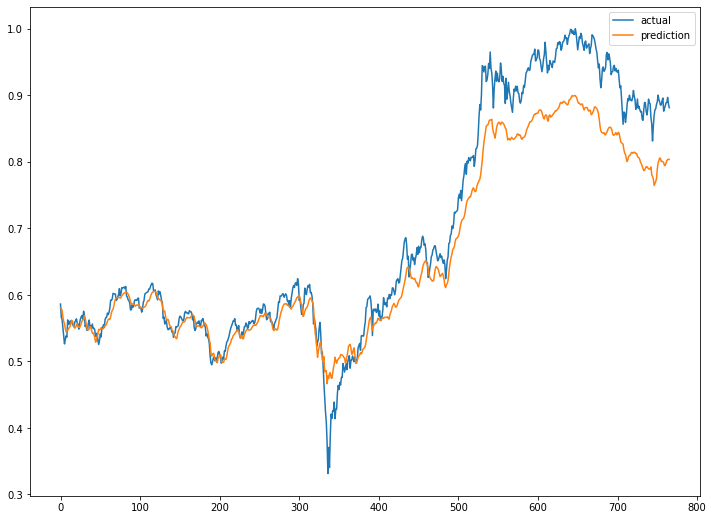

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 20, 32)            2112      
                                                                 
 lstm_7 (LSTM)               (None, 16)                3136      
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

print("MSE:" + str(mean_squared_error(pred, y_test[20:])))
print("RMSE:" + str(np.sqrt(mean_squared_error(pred, y_test[20:]))))
print("RSLE:" + str(mean_squared_log_error(pred, y_test[20:])))

MSE:0.002865015752837427
RMSE:0.05352584191619434
RSLE:0.0008677889467807385
